In [1]:
import numpy as np
import matplotlib.pyplot as plt
import load_cifar
import random
import svm

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
dataset_dir = 'F:\ML\Winter-2016-CS231N-master\Assignment1\cs231n\datasets\cifar-10-batches-py'
Xtr,ytr,Xte,yte = load_cifar.load(dataset_dir)

In [3]:
num_train = 49000
num_test = 1000
num_val = 1000
num_dev = 500  #this is used to check gardient,loss sanity

Xvl = Xtr[num_train:]
yvl = ytr[num_train:]

Xtr = Xtr[:num_train]
ytr = ytr[:num_train]

Xte = Xte[:num_test]
yte = yte[:num_test]

r = np.random.choice(num_train,num_dev,replace = 'false')
Xdv = Xtr[r] 
ydv = ytr[r]

print ('X_train shape:',Xtr.shape)
print ('Y_train shape:',ytr.shape)
print ('X_test shape:',Xte.shape)
print ('Y_test shape:',yte.shape)
print ('X_val shape:',Xvl.shape)
print ('Y_val shape:',yvl.shape)
print ('X_dev shape:',Xdv.shape)
print ('Y_dev shape:',ydv.shape)

X_train shape: (49000, 32, 32, 3)
Y_train shape: (49000,)
X_test shape: (1000, 32, 32, 3)
Y_test shape: (1000,)
X_val shape: (1000, 32, 32, 3)
Y_val shape: (1000,)
X_dev shape: (500, 32, 32, 3)
Y_dev shape: (500,)


In [4]:
Xtr = Xtr.reshape(Xtr.shape[0],-1)
Xte = Xte.reshape(Xte.shape[0],-1)
Xdv = Xdv.reshape(Xdv.shape[0],-1)
Xvl = Xvl.reshape(Xvl.shape[0],-1)

print ('X_train shape:',Xtr.shape)
print ('X_test shape:',Xte.shape)
print ('X_val shape:',Xvl.shape)
print ('X_dev shape:',Xdv.shape)


X_train shape: (49000, 3072)
X_test shape: (1000, 3072)
X_val shape: (1000, 3072)
X_dev shape: (500, 3072)


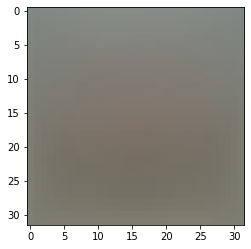

In [5]:
mean_pic = np.mean(Xtr,axis = 0)
a = mean_pic.reshape(32,32,3).astype('int')
plt.imshow(a)

In [6]:
Xtr -= mean_pic
Xte -= mean_pic
Xvl -= mean_pic
Xdv -= mean_pic

In [7]:
#bias trick
Xtr = np.hstack((Xtr,np.ones((Xtr.shape[0],1))))
Xdv = np.hstack((Xdv,np.ones((Xdv.shape[0],1))))
Xvl = np.hstack((Xvl,np.ones((Xvl.shape[0],1))))
Xte = np.hstack((Xte,np.ones((Xte.shape[0],1))))


In [8]:
num_classes = 10
W = np.random.randn(Xtr.shape[1],num_classes) / np.sqrt(Xtr.shape[1]/2)
loss , grad = svm.compute_loss(Xdv,ydv,W,1e-3)

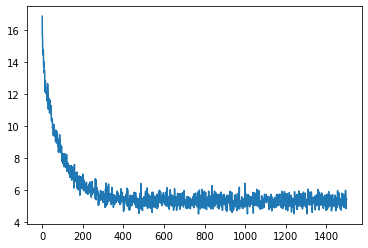

5.483590393253794

In [9]:
weight,loss_history = svm.train(Xtr,ytr,200,5e4,1e-7 ,1500)
#def train(X, y, batch_size, landa, lr, epochs):
plt.plot(np.arange(len(loss_history)),loss_history)
plt.show()
loss_history[-1]

In [10]:
acc = svm.predict(Xtr,ytr,weight)
acc

0.37151020408163266

In [ ]:
lrs = [1e-7,1e-6]
landas =[(j+0.1*i)*1e4 for j in range(1,5) for i in range(0,10)]
best_acc = 0
best_w = 0
for i in lrs:
    for j in landas:
        weight,loss_history = svm.train(Xtr,ytr,200,j,i ,1500)
        tr_acc = svm.predict(Xtr,ytr,weight)
        vl_acc = svm.predict(Xvl,yvl,weight)
        print ('lr:',i,' landa:',j,' vl_acc:',vl_acc,' tr_acc:',tr_acc)
        if vl_acc > best_acc:
            best_acc = vl_acc
            best_w = weight

            

lr: 1e-07  landa: 10000.0  vl_acc: 0.395  tr_acc: 0.3925918367346939
lr: 1e-07  landa: 11000.0  vl_acc: 0.391  tr_acc: 0.39102040816326533
lr: 1e-07  landa: 12000.0  vl_acc: 0.387  tr_acc: 0.3899591836734694
lr: 1e-07  landa: 13000.0  vl_acc: 0.392  tr_acc: 0.3856530612244898
lr: 1e-07  landa: 14000.0  vl_acc: 0.388  tr_acc: 0.38902040816326533
lr: 1e-07  landa: 15000.0  vl_acc: 0.388  tr_acc: 0.3862040816326531
lr: 1e-07  landa: 16000.0  vl_acc: 0.387  tr_acc: 0.3881428571428571
lr: 1e-07  landa: 17000.0  vl_acc: 0.391  tr_acc: 0.38481632653061226
lr: 1e-07  landa: 18000.0  vl_acc: 0.395  tr_acc: 0.38902040816326533
lr: 1e-07  landa: 19000.0  vl_acc: 0.393  tr_acc: 0.39153061224489794
lr: 1e-07  landa: 20000.0  vl_acc: 0.399  tr_acc: 0.3826938775510204
lr: 1e-07  landa: 21000.0  vl_acc: 0.384  tr_acc: 0.3807755102040816
lr: 1e-07  landa: 22000.0  vl_acc: 0.382  tr_acc: 0.3798367346938776
lr: 1e-07  landa: 23000.0  vl_acc: 0.38  tr_acc: 0.38051020408163266
lr: 1e-07  landa: 24000.0  vl

In [ ]:
Xte
test_acc = svm.predict(Xte,yte,best_w)
test_acc

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
final_w = best_w
final_w = final_w[:-1,:]
w_max ,w_min = np.max(final_w),np.min(final_w)
for i in range(final_w.shape[1]):
    v = (255.0 * ((final_w[:,i]-w_min)/(w_max-w_min))).reshape(32,32,3)
    plt.subplot(2,5,i+1)
    plt.title(classes[i])
    plt.axis('off')
    plt.imshow(v.astype('uint8'))

In [ ]:
a = np.arange(3)
